# Useful librairies

In [7]:
import pandas as pd
from pathlib import Path

import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams["figure.facecolor"] = "white"
import numpy as np
import sys

# Data Importation

In [4]:
#create a dataframe from the csv file Time_Value_CM.csv 
df = pd.read_csv('Time_Value_CM.csv', names=['Date', 'Value'])
df.head()

,Date,Value
0,2022-05-02T00:01:00Z,178961.742
1,2022-05-02T00:02:00Z,170609.878
2,2022-05-02T00:03:00Z,168829.864
3,2022-05-02T00:04:00Z,173252.734
4,2022-05-02T00:05:00Z,177271.117


# EDA

In [18]:
#convert the date column to datetime format 
df['Date'] = pd.to_datetime(df['Date'], format="%Y-%m-%dT%H:%M:%SZ")
df.sort_values(by='Date', inplace=True)

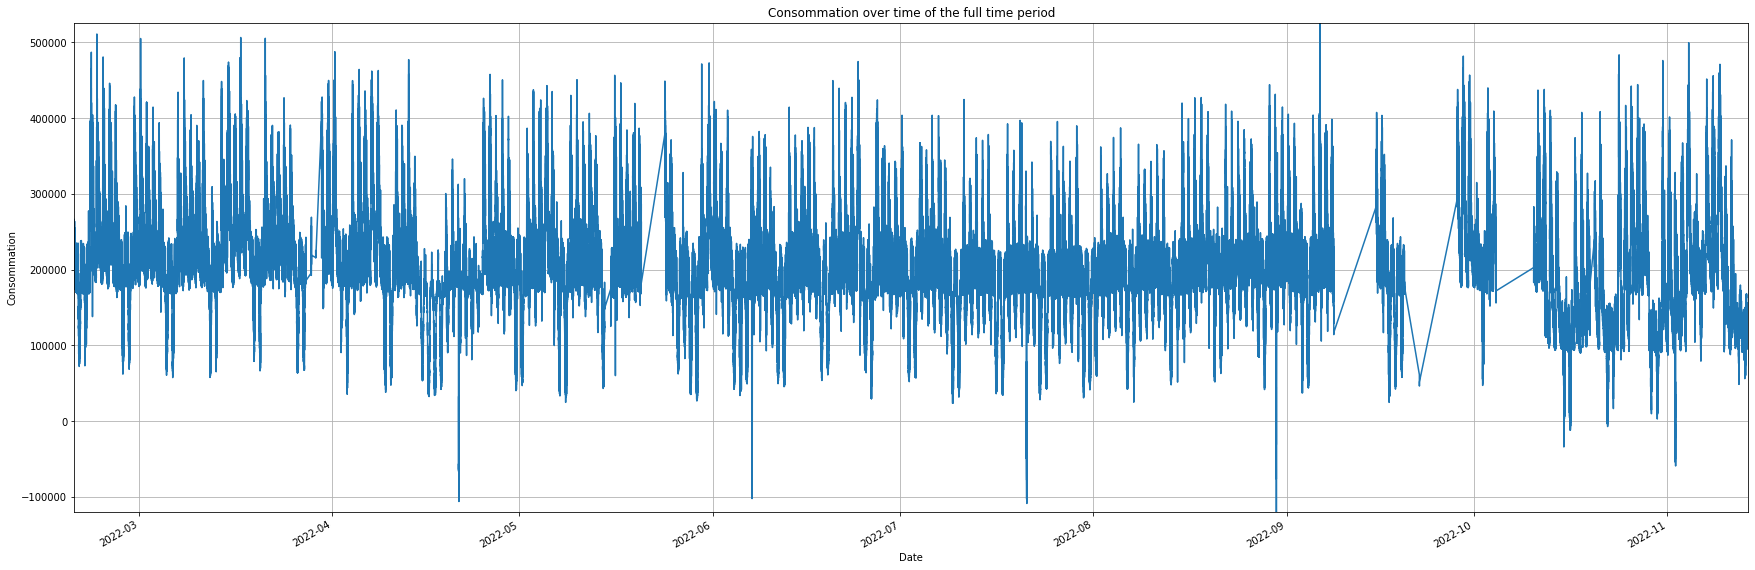

In [29]:
def plot_consommation_over_time_detailed_graph(): 
    fig, ax = plt.subplots(figsize=(30, 10))
    ax.plot(df['Date'], df['Value'])
    ax.set_title('Consommation over time of the full time period')
    ax.set_xlabel('Date')
    ax.set_ylabel('Consommation')
    ax.set_xlim(df['Date'].min(), df['Date'].max())
    ax.set_ylim(df['Value'].min(), df['Value'].max())
    ax.grid(True)
    fig.autofmt_xdate()
    plt.show()

plot_consommation_over_time_detailed_graph()

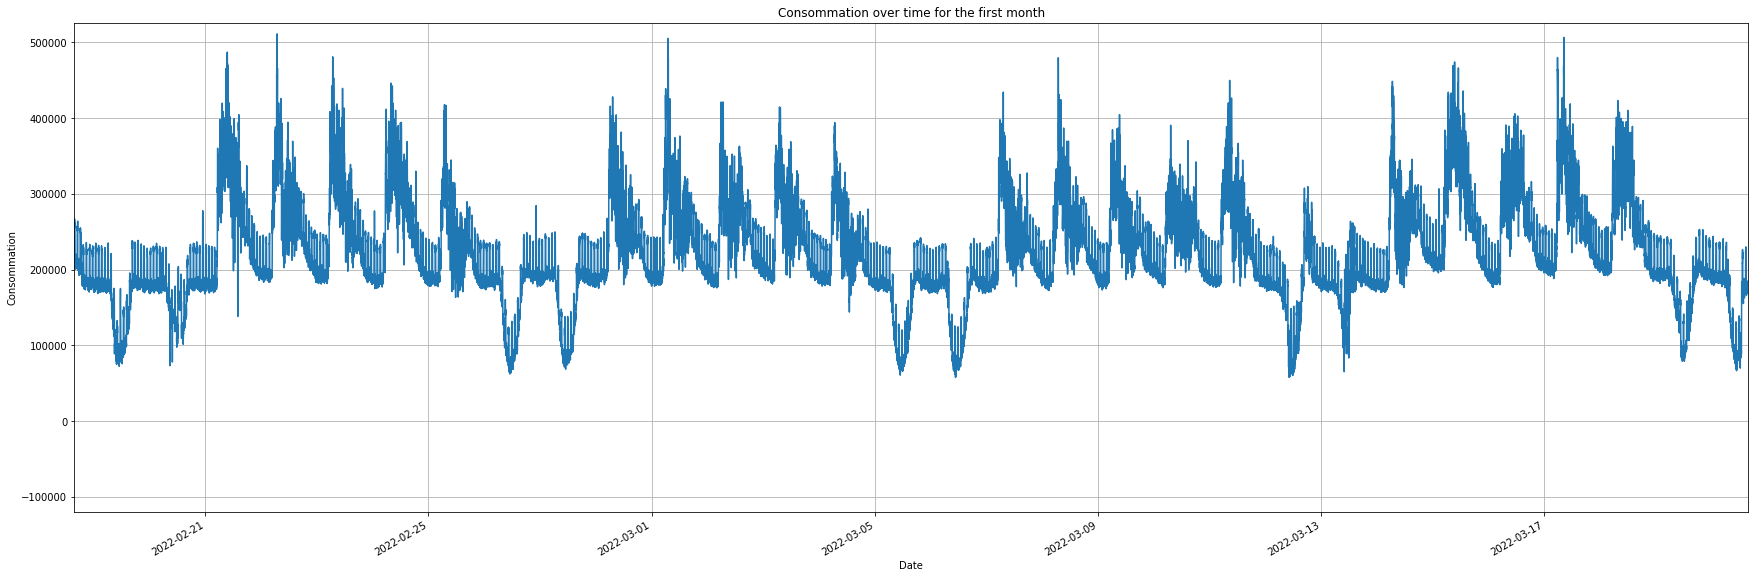

In [28]:
#function to plot the first 30 days 
def plot_consommation_over_time_zoomed_graph():
    fig, ax = plt.subplots(figsize=(30, 10))
    ax.plot(df['Date'], df['Value'])
    ax.set_title('Consommation over time for the first month')
    ax.set_xlabel('Date')
    ax.set_ylabel('Consommation')
    ax.set_xlim(df['Date'].min(), df['Date'].min() + pd.Timedelta(days=30))
    ax.set_ylim(df['Value'].min(), df['Value'].max())
    ax.grid(True)
    fig.autofmt_xdate()
    plt.show()

plot_consommation_over_time_zoomed_graph()


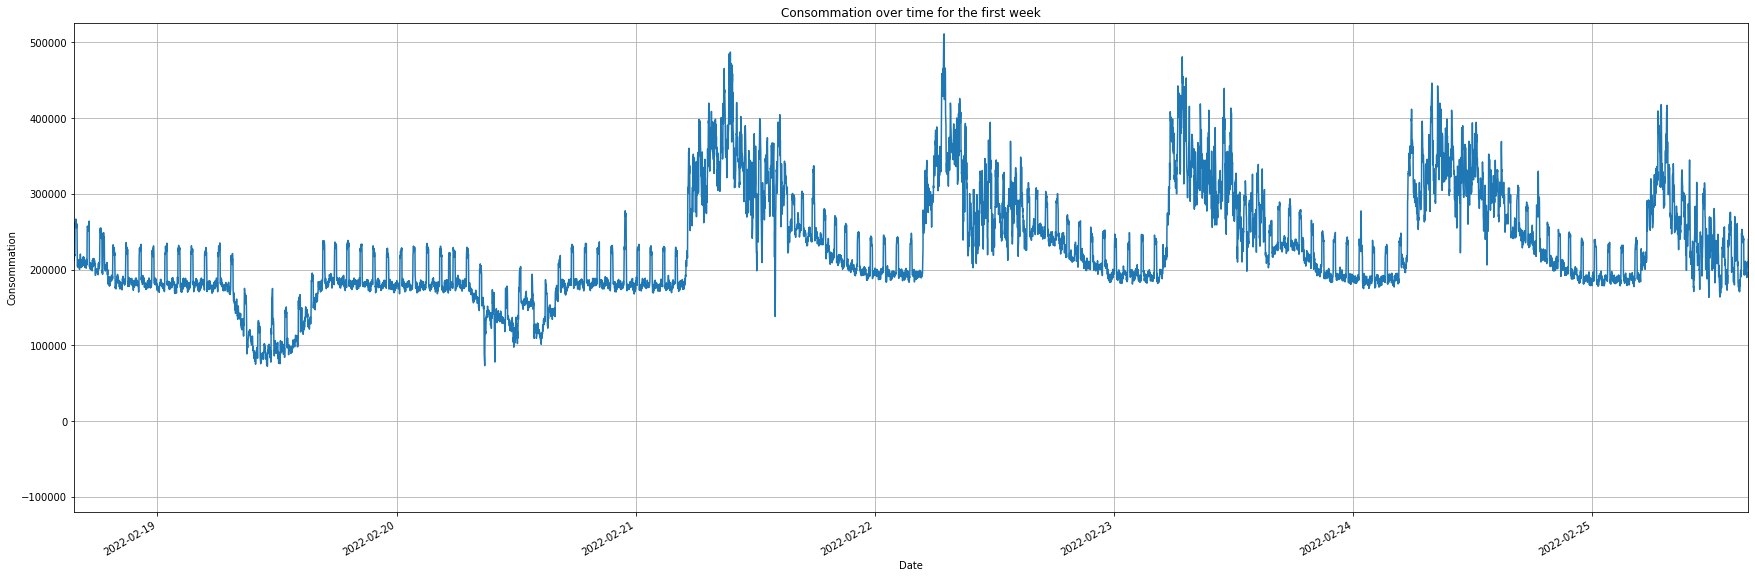

In [27]:
# function to plot the first week 
def plot_consommation_over_time_first_week():
    fig, ax = plt.subplots(figsize=(30, 10))
    ax.plot(df['Date'], df['Value'])
    ax.set_title('Consommation over time for the first week')
    ax.set_xlabel('Date')
    ax.set_ylabel('Consommation')
    ax.set_xlim(df['Date'].min(), df['Date'].min() + pd.DateOffset(days=7))
    ax.set_ylim(df['Value'].min(), df['Value'].max())
    ax.grid(True)
    fig.autofmt_xdate()
    plt.show()

plot_consommation_over_time_first_week()

In [22]:
#add a column to datafame with 0 if it is a weekend day and 1 if it is a weekday
df['Weekend'] = df['Date'].dt.dayofweek.isin([5,6]).astype(int)
df.tail()

,Date,Value,Weekend,Winter
343235,2022-11-13 23:56:00,97817.538,1,1
343236,2022-11-13 23:57:00,97344.145,1,1
343237,2022-11-13 23:58:00,96617.403,1,1
343238,2022-11-13 23:59:00,96638.174,1,1
343239,2022-11-14 00:00:00,99724.063,0,1


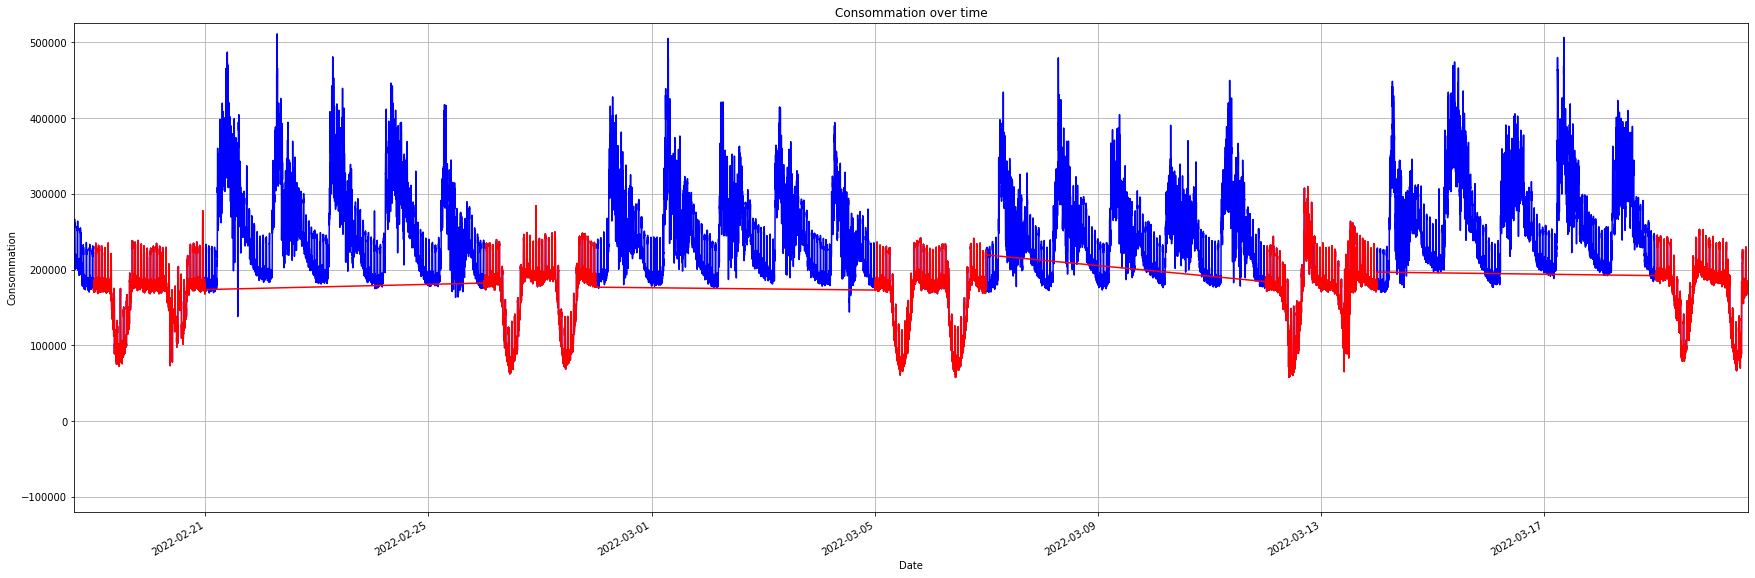

In [23]:
#function to plot the value with another color for the weekend days 
def plot_consommation_over_time_weekend():
    fig, ax = plt.subplots(figsize=(30, 10))
    ax.plot(df['Date'], df['Value'], color='blue')
    ax.plot(df[df['Weekend'] == 1]['Date'], df[df['Weekend'] == 1]['Value'], color='red')
    ax.set_title('Consommation over time')
    ax.set_xlabel('Date')
    ax.set_ylabel('Consommation')
    ax.set_xlim(df['Date'].min(), df['Date'].min() + pd.Timedelta(days=30))
    ax.set_ylim(df['Value'].min(), df['Value'].max())
    ax.grid(True)
    fig.autofmt_xdate()
    plt.show()

plot_consommation_over_time_weekend()

In [24]:
#add a column to the dataframe if it is winter 1 and if it is summer 0
df['Winter'] = df['Date'].dt.month.isin([11,12,1,2,3]).astype(int)
df.tail()

,Date,Value,Weekend,Winter
343235,2022-11-13 23:56:00,97817.538,1,1
343236,2022-11-13 23:57:00,97344.145,1,1
343237,2022-11-13 23:58:00,96617.403,1,1
343238,2022-11-13 23:59:00,96638.174,1,1
343239,2022-11-14 00:00:00,99724.063,0,1


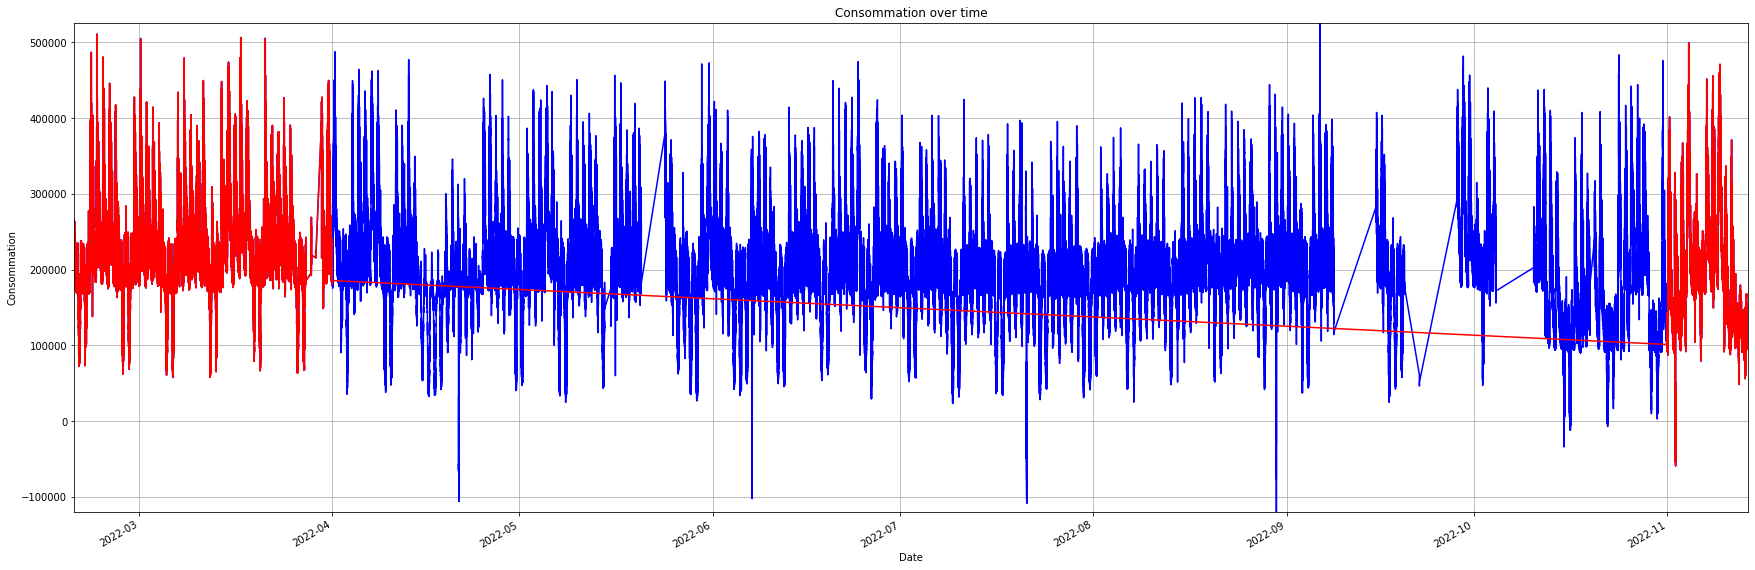

In [25]:
#plot the value with another color for the winter days
def plot_consommation_over_time_winter():
    fig, ax = plt.subplots(figsize=(30, 10))
    ax.plot(df['Date'], df['Value'], color='blue')
    ax.plot(df[df['Winter'] == 1]['Date'], df[df['Winter'] == 1]['Value'], color='red')
    ax.set_title('Consommation over time')
    ax.set_xlabel('Date')
    ax.set_ylabel('Consommation')
    ax.set_xlim(df['Date'].min(), df['Date'].max())
    ax.set_ylim(df['Value'].min(), df['Value'].max())
    ax.grid(True)
    fig.autofmt_xdate()
    plt.show()

plot_consommation_over_time_winter()

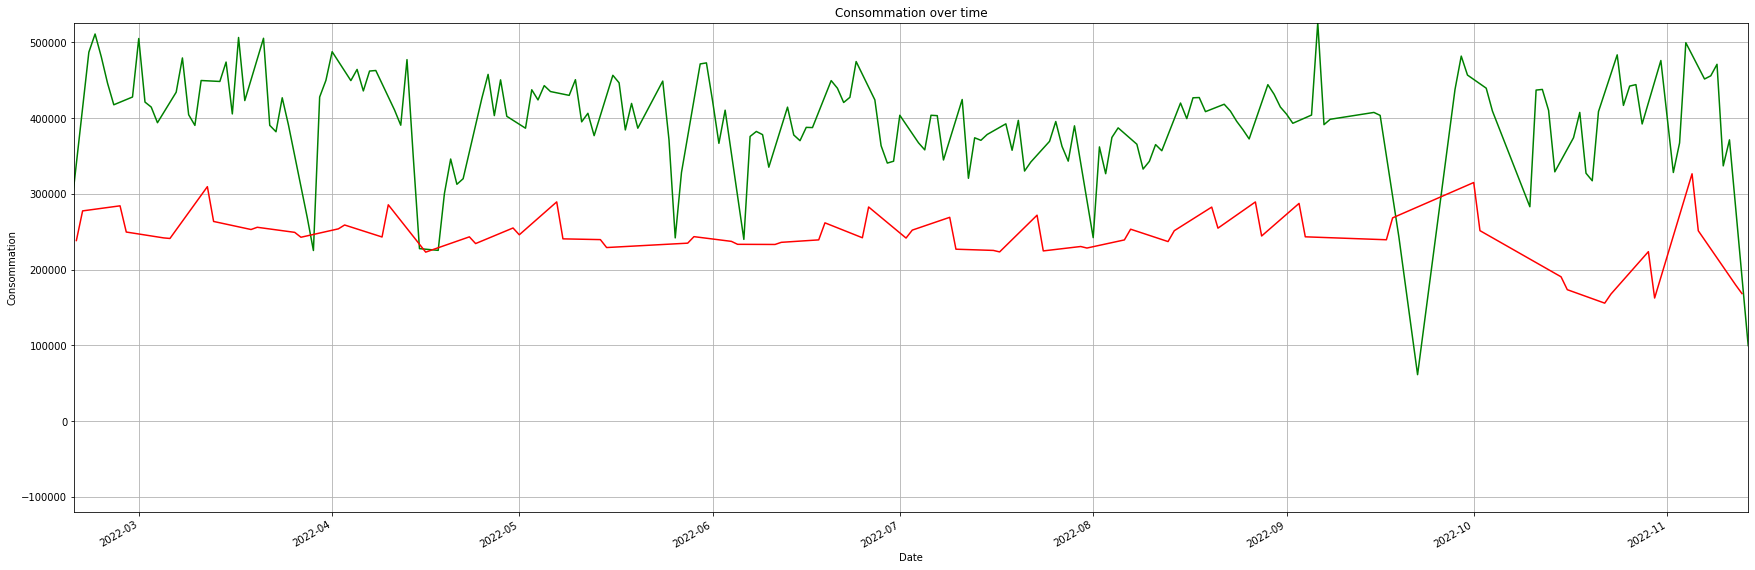

In [26]:
#plot the peak value for each day with another color for the winter days over all the time without the weekends 
def plot_consommation_over_time_winter_peak():
    fig, ax = plt.subplots(figsize=(30, 10))
    #ax.plot(df['Date'], df['Value'], color='blue')
    #ax.plot(df[df['Winter'] == 1]['Date'], df[df['Winter'] == 1]['Value'], color='red')
    ax.plot(df[df['Weekend'] == 0].groupby(df['Date'].dt.date)['Value'].max(), color='green')
    ax.plot(df[df['Weekend'] == 1].groupby(df['Date'].dt.date)['Value'].max(), color='red')
    ax.set_title('Consommation over time')
    ax.set_xlabel('Date')
    ax.set_ylabel('Consommation')
    ax.set_xlim(df['Date'].min(), df['Date'].max())
    ax.set_ylim(df['Value'].min(), df['Value'].max())
    ax.grid(True)
    fig.autofmt_xdate()
    plt.show()

plot_consommation_over_time_winter_peak()